# Macroeconomics III: Problem Set 1

Student: Rafael F. Bressan

# 1 No Economics

## 1. **Solving Nonlinear Equations - Bisection Method.** Consider the function:

$$b(x) = e^x − e^{2.2087}$$

Starting from the interval $x \in [0, 4]$, find $x^∗$ such that $b(x^∗) = 0$ using the bisection method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)  #set default figure size
from scipy import interpolate
%matplotlib inline

In [2]:
def f(x):
    return np.exp(x) - np.exp(2.2087)

In [3]:
def bisection(func, a, b, tol = 1e-8):
    if func(a)*func(b)>0:
        print('Conditions for the Intermidiate Value Theorem do not hold')
    else:
        # First middle point
        c = (a+b)/2
        error = abs(func(c))
        # ~ print(error) 
        # bisection loop
        while error > tol:
            if func(c)*func(a) < 0:
                b = c
            else:
                a = c
            c = (a+b)/2
            error = abs(func(c))
            # ~ print(error)

    return c

In [4]:
root = bisection(f, 0, 4)
print(f"Root of the function: {root}.")

Root of the function: 2.2086999993771315.


## 2. **Solving Nonlinear Equations - Newton’s Method.** Consider the function:
$$d(x) = x^{−5} − x^{−3} − c.$$

(a) Set $c = 1$ and plot $d$ on $x \in [0.6, 10]$. Find $x^∗$ such that $d(x^∗) = 0$ using Newton’s
method.


In [5]:
def d(x, c):
    return x**(-5)-x**(-3)-c

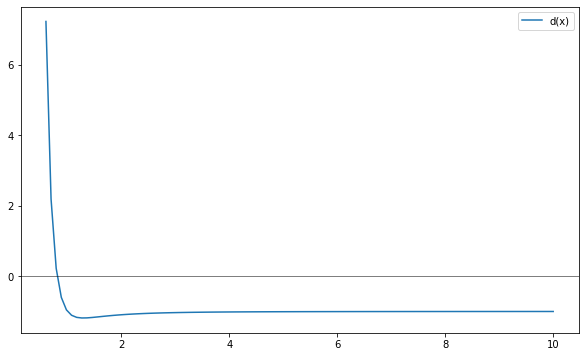

In [6]:

xg=np.linspace(0.6, 10, 100)
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(xg, d(xg, 1), label = "d(x)")
ax.axhline(y=0, color='black', lw=0.5)
ax.legend()

In [7]:
def newton(x0, f, J, tol=1e-8, maxit=100):
    error = abs(f(x0))
    xs = x0
    i = 0
    while error > tol:
        xs1 = xs - f(xs)/(J(xs) + tol)
        #Somamos um numero pequeno para evitar que haja divisões por zero
        error = abs(f(xs1))
        xs = xs1
        i += 1
        if i == maxit:
            warning = 'The algorithm did not converge in the first ' + str(maxit) + ' iterations.'
            return warning
            break
    return xs1

In [8]:

# Define the Jacobian (derivative)
def dd(x):
    return -5*x**(-6)+3*x**(-4)

# Encapsulate the value of c=1
def d1(x):
    return d(x, 1)

In [9]:
root=newton(0.65, d1, dd)
print(f"Root of the function: {root}.")

Root of the function: 0.808730600479392.



(b) Now construct an equidistant grid for $c$ containing 10 nodes between 1 and 10,
and for each value of c on the grid find $x^∗$.

In [10]:
c=np.linspace(1, 10, 10)
root=np.zeros(10)
for i in range(len(c)):
    def dc(x):
        return d(x, c[i])
    
    root[i]=newton(0.8, dc, dd)
    print(f"Root for c={c[i]}: {root[i]}")

Root for c=1.0: 0.8087306004782296
Root for c=2.0: 0.7419124700395855
Root for c=3.0: 0.7011546384334304
Root for c=4.0: 0.6720474338673877
Root for c=5.0: 0.6495404164547445
Root for c=6.0: 0.6312716818829904
Root for c=7.0: 0.6159478006833599
Root for c=8.0: 0.6027847151489539
Root for c=9.0: 0.5912719407313949
Root for c=10.0: 0.5810589510998727



(c) Construct a new equidistant grid for $c$ containing 1000 nodes between 1 and 10,
and plot your solution for each value on this grid using a spline.

Text(0, 0.5, 'root')

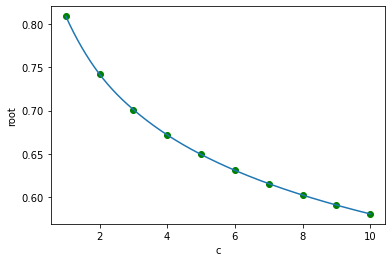

In [11]:
# B-Spline cubic
sp=interpolate.splrep(c, root)
fine_c=np.linspace(1, 10, 1000)
sp_fine=interpolate.splev(fine_c, sp)

fig, ax = plt.subplots()
ax.scatter(c, root, c='green')
ax.plot(fine_c, sp_fine)
ax.set_xlabel('c')
ax.set_ylabel('root')

(d) Relabel your solution $x^∗$ from part (b) $x(c)$. Find the inverse function $c(x)$,
and plot it on an equidistant grid of 1000 nodes on $x \in [0.6, 10]$ using a spline
approximation.

In [12]:
def x(c):
    def dc(x):
        return d(x, c)
    
    return newton(0.8, dc, dd)

In [13]:
# Inverse function
def c(x):
    return x**(-5)-x**(-3)

Text(0, 0.5, 'c')

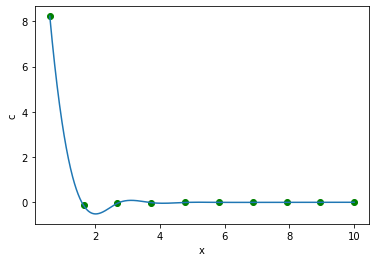

In [14]:
x_grid=np.linspace(0.6, 10, 10)
fine_x=np.linspace(0.6, 10, 1000)
# c(x) values
c_val=c(x_grid)
# B-Spline cubic
sp=interpolate.splrep(x_grid, c_val)
sp_fine=interpolate.splev(fine_x, sp)

fig, ax = plt.subplots()
ax.scatter(x_grid, c_val, c='green')
ax.plot(fine_x, sp_fine)
ax.set_xlabel('x')
ax.set_ylabel('c')


(e) Now find the solution to:
0 = c(x) + x.

In [15]:
# Let g(x) := c(x) + x
def g(x):
    return c(x) + x

def dg(x):
    return -5*x**(-6)+3*x**(-4)+1

In [16]:
root=newton(0.5, g, dg)
print(f"Root of the function: {root}.")

Root of the function: The algorithm did not converge in the first 100 iterations..


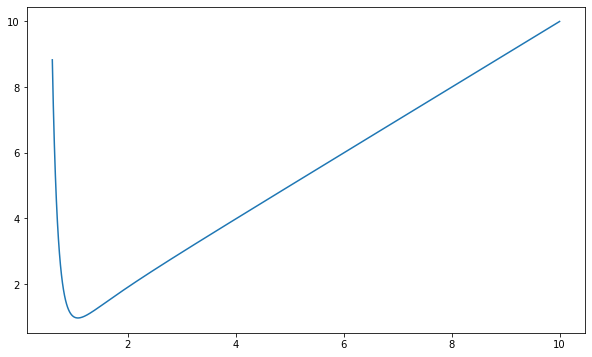

In [17]:
g_fine=g(fine_x)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(fine_x, g_fine)

Given the above plot, no wonder the algorithm did not find a root. The function doe not have a real root.

## 3. **Approximation Methods: Finite Element Methods.** Consider the function $h(x)$ on the domain $x \in[-2,2]$ :
$$
h(x)=\left\{\begin{array}{lc}
(x-0.5)^{2} & \text { for } 0 \leq x \leq 2 \\
(x+0.5)^{2} & \text { for }-2 \leq x<0
\end{array}\right.
$$

(a) Approximate $h(x)$ with a cubic spline, using $n=5$ equally spaced nodes. Plot the function along with your approximation and calculate the root mean squared error of your approximation over the fine grid, with interval $0.0001$.

In [18]:
def h_scalar(x):
    if x >= -2 and x < 0:
        return (x+0.5)**2
    elif x >= 0 and x <= 2:
        return (x-0.5)**2
    else:
        return np.nan

# Vectorize the function
h=np.vectorize(h_scalar)

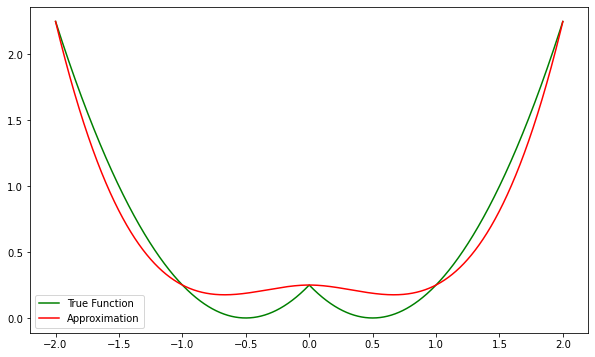

In [19]:
n=np.linspace(-2, 2, 5)
x=np.arange(-2, 2, 0.0001)
# B-Spline cubic
sp=interpolate.splrep(n, h(n))
sp_eval=interpolate.splev(x, sp)
# Plot the functions
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(x, h(x), color='green', label='True Function')
ax.plot(x, sp_eval, color='red', label='Approximation')
ax.legend()

The **root mean squared error** (RMSE) is computed as follows:
$$
RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - y_i)^2}
$$

for two vectors $x$ and $y$.

In [20]:
def rmse(x, y):
    return np.sqrt(np.mean((x-y)**2))

rmserr=rmse(h(x), sp_eval)
print(f"The RMSE is: {rmserr}")

The RMSE is: 0.13801311186847837



(b) Approximate $h(x)$ with a cubic spline, using $n=10$ equally spaced nodes. Plot this new approximation along with both the actual function and your approximation from (a) and calculate the root mean squared error of your approximation over the fine grid, with interval $0.0001$. Explain the reasons for the differences in your answers.

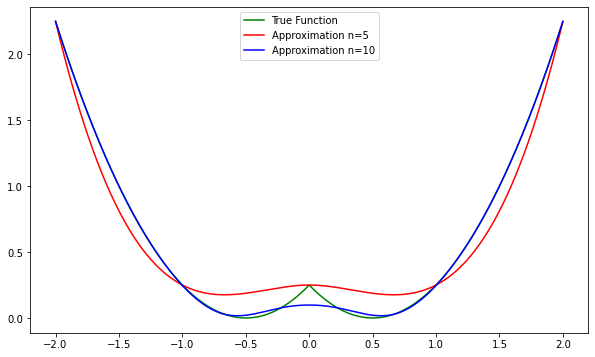

In [21]:
n10=np.linspace(-2, 2, 10)
# B-Spline cubic
sp10=interpolate.splrep(n10, h(n10))
sp10_eval=interpolate.splev(x, sp10)
# Plot the functions
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(x, h(x), color='green', label='True Function')
ax.plot(x, sp_eval, color='red', label='Approximation n=5')
ax.plot(x, sp10_eval, color='blue', label='Approximation n=10')
ax.legend()

In [22]:
rmserr10=rmse(h(x), sp10_eval)
print(f"The RMSE is: {rmserr10}")

The RMSE is: 0.027642024417801263


The higher the number of nodes, more reference knots we have to compute the spline approximation. These knots (they are at the true function value) limit the range the approximation can differ from the true function, thus, improving the results. 


## 4. In this question, you will use a Monte Carlo procedure to estimate the value of $\pi$. Pick a square with a perimeter of $8 r$ and inscribe a circumference with a $2 r$ diameter on it. We are able to estimate $\pi$ by randomly drawing points inside the square and counting how many of them lie inside the circle.[^1]

[^1]: To visualise the method, you can check this YouTube video [https://www.youtube.com/watch?v=ELetCV_wX_c](https://www.youtube.com/watch?v=ELetCV_wX_c).

(a) Describe in detail the algorithm you intend to use to estimate $\pi$.

I will anchor the bottom-left corner of the square at the origin, such that the square is the cartesian product $(0, 2r)\times(0, 2r)$. The circle will be centered at $(r, r)$ and will have radius $r$.

Then I will randomly draw two independent sequences $x, y \in [0, 2r]$ to form the square point $(x, y)$. This point will lie inside the circle if its distance to the circle's center, $(r, r)$, is lower than or equal to $r$. The proportion of points inside the circle will approximate the ratio of areas between the circle and the square, $R=\frac{\pi r^2}{4 r^2}=\pi/4$. Therefore, my approximation to $\pi$ will be: $\pi\approx 4R$.


(b) Plot the square, the inscribed circumference and a random draw of 100 points. What is the value of your estimated $\pi$ with this 100 points.

In [23]:

class pi_approx():
    
    def __init__(self, radius=1, n_points=100, seed=1234) -> None:
        self.r = radius
        self.n = n_points
        self.seed = seed
        self.pi = np.nan
        self.x = np.zeros(n_points)
        self.y = np.zeros(n_points)
    
    def approximate(self):
        # set seed
        rng=np.random.default_rng(self.seed)
        self.x=rng.uniform(0, 2*self.r, self.n)
        self.y=rng.uniform(0, 2*self.r, self.n)
        point=np.array(list(zip(self.x, self.y)))
        center=np.array((self.r, self.r))
        # Euclidean distance of points from center
        dist=np.linalg.norm(point-center, axis=1)
        self.pi=4*np.sum(np.less_equal(dist, self.r))/self.n
        # print(f"Approximate Pi: {self.pi}")
    
    def get_pi(self):
        return self.pi
    
    def plot(self):
        fig,ax=plt.subplots(figsize=(10,6))
        ax.hlines(y=0, xmin=0, xmax=2*self.r)
        ax.hlines(y=2*self.r, xmin=0, xmax=2*self.r)
        ax.vlines(x=0, ymin=0, ymax=2*self.r)
        ax.vlines(x=2*self.r, ymin=0, ymax=2*self.r)
        theta=np.linspace(0, 2*np.pi, 200)
        xc=self.r+self.r*np.cos(theta)
        yc=self.r+self.r*np.sin(theta)
        ax.plot(xc, yc, color='green')
        ax.scatter(self.x, self.y, color='black')
        ax.set_aspect(1)
        ax.set_title(f"{self.n} points randomly drawn")

In [24]:
pi_ap = pi_approx()
pi_ap.approximate()
print(f"Approximate Pi: {pi_ap.get_pi()}")

Approximate Pi: 2.96


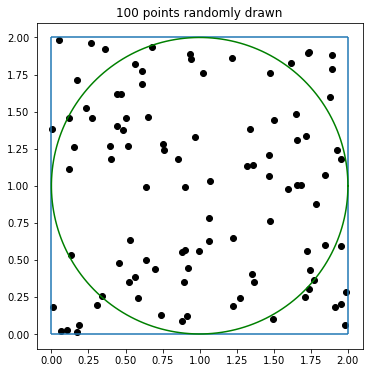

In [25]:
pi_ap.plot()



(c) Replicate your algorithm 20 times, using different amounts of random draws $(n=5000,10000,15000, \ldots, 100000)$. Plot the estimates of $\pi$ in the vertical axis as a function of the number of random draws $(n)$ in the horizontal axis.

In [26]:
def pi_d(n_points):
    pid = pi_approx(n_points=n_points)
    pid.approximate()
    return pid.get_pi()

# 2 Economics

## 5. **Two-period model.** Consider the following two-period $(t=0,1)$ standard model economy. There is a continuum of agents of measure $1 .$ Each agent is endowed with one unit of time in each period, which can be used for leisure $l$ or hours worked $h$. Preferences are over consumption $c$ and leisure $l$ and are represented by
$$
U=\sum_{t=0}^{1} \beta^{t}\left(u\left(c_{t}\right)+\gamma v\left(l_{t}\right)\right), \gamma>0 \text { and } \beta \in(0,1)
$$
and $u(c)=\frac{c^{1-\sigma}-1}{1-\sigma}$ and $v(l)=\frac{l^{1-\sigma}-1}{1-\sigma}$ with $\sigma>0 .$ On the production side, there is a continuum of firms of measure one, each with access to a technology to produce the consumption good:
$$
Y_{t}=A_{t} L_{t}^{\alpha}, A_{t}>0 \text { and } \alpha \in(0,1)
$$
where $Y_{t}$ is output, $L_{t}$ denotes labor input and $A_{t}$ is a productivity factor. Each household is entitled to an equal share of dividends of the firms. Suppose that there is an asset market that agents can trade one-period bonds, such that budget constraints can be written as (I should not have written them because this is part of an exercise of thinking about writing your own economy)
$$
c_{0}+a_{1}=w_{0} h_{0}+\pi_{0}
$$
and
$$
c_{1}=w_{1} h_{1}+(1+r) a_{1}+\pi_{1}
$$
$\pi_{t} \mathrm{~s}$ are profits and they are taken as given by households. Carefully address the following questions.

(a) Define a competitive equilibrium for this economy. Be precise about the problem of each agent, each firm and market clearing conditions.

There are three requirements for a competitive equilibrium, corresponding to: 1) households maximize utility; 2) firms maximize their profit; and that “markets clear” at the equilibrium price. 

1. Households Problem

$$
\begin{align*}
    \max_{c_0,c_1,h_0,h_1,a_1}&U = u(c_0) + \gamma v(1-h_0) + \beta u(c_1) + \beta \gamma v(1-h_1)\tag{HP}\\
    s.t\quad &c_0+a_1 = w_0h_0+\pi_0\\
    &c_1 = w_1h_1+\pi_1+(1+r)a_1\\
    &l_0+h_0=1\\
    &l_1+h_1=1
\end{align*} 
$$

2. Firms Problem

$$
\begin{align*}
    \max_{L_t}\quad &\pi_t = p_tA_tL_t^\alpha - w_tL_t\quad t=\{0,1\}\tag{FP}
\end{align*}
$$

3. Market Clearing

Total consumption plus savings must equal total production plus interest at a given period

3.1 $c_0+a_1=Y_0$

3.2 $c_1=(1+r)a_1+Y_1$

and labor supply matches demand

3.3 $h_t=L_t$

where $c_t$ denotes consumption at period $t$ from all households, which has a measure of 1 and $Y_t$ denotes total production of the final good from firms, which also has a measure of 1.

(b) Derive the first-order conditions of the problem of each agent and each firm and go as far as possible in writing the market clearing equilibrium conditions.

The First Order Conditions for HP is:
$$
\begin{align*}
    &\mathcal{L} = u(c_0) + \gamma v(1-h_0) + \beta u(c_1) + \beta\gamma v(1-h_1) + \lambda_0 [w_0 h_0 + \pi_0 - c_0 - a_1] + \lambda_1[w_1 h_1 + \pi_1 + (1+r)a_1 - c_1]\\
    &c_0: u'(c_0) - \lambda_0 = 0\\
    &c_1: \beta u'(c_1) - \lambda_1= 0\\
    &h_0: -\gamma v'(1-h_0) + \lambda_0 w_0 = 0\\
    &h_1: -\beta\gamma v'(1-h_1) + \lambda_1 w_1 = 0\\
    &a_1: -\lambda_0 + \lambda_1(1+r) = 0
\end{align*}
$$

Solving those equations we arrive at the Euler equation and the intertemporal labor supply substitution that characterizes the problem.

$$
\begin{equation}
\left. \begin{aligned}
u'(c_0)=\gamma\frac{v'(1-h_0)}{w_0}\\
u'(c_1)=\gamma\frac{v'(1-h_1)}{w_1}
\end{aligned}
\right\rbrace \implies u'(c_0)=\beta(1+r)u'(c_1)\qquad\text{Euler equation}
\end{equation}
$$

$$
\begin{equation}
v'(1-h_0) w_1 = \beta(1+r) v'(1-h_1)w_0 \qquad\text{intertemporal labor supply substitution}
\end{equation}
$$

This system could be solved by writing all endogenous variables, $c_1$, $h_0$, $h_1$ and $a_1$ in terms of $c_0$, then using the first constraint equation, $c_0=w_0h_0+\pi_0-a_1$ we can find $c_0(\beta, r, w_0, w_1)$ and recursively substitute to find all other endogenous variables.

The First Order Condition for FP is:

$$
\begin{equation}
\frac{w_t}{p_t} = \alpha A_t L_t^{\alpha-1}  \quad t=\{0,1\}
\end{equation}
$$

Here we can see the FP is static and we are assuming firms are price takers at any given period.

Finally, market clearing implies:
$$
\begin{align}
    &h_t=L_t\\
    &c_0+a_1=A_0 L_0^\alpha\\
    &c_1=(1+r)a_1 + A_1 L_1^\alpha\\
\end{align}
$$

(c) Now, let $A_{0}=1, A_{1}=1, \alpha=2 / 3, \sigma=2, \beta=0.98^{25}$ (subjective discount rate of $2 \%$ per year, but a model period is 25 years) and $\gamma=1 .$ Find all allocations (consumption, labor, leisure and assets) and prices $\left(w_{0}, w_{1}\right.$ and $\left.r\right)$ for this economy. You probably need to do this numerically - explain how you did it.

In [27]:
from scipy.optimize import root

In [28]:
class twop_economy():
    
    def __init__(self, A0, A1, alpha, sigma, beta, gama, r) -> None:
        self.A0, self.A1, self.alpha, self.sigma, self.beta, self.gama, self.r = A0, A1, alpha, sigma, beta, gama, r
        
    
    def u(self, c):
        return (c**(1-self.sigma)-1)/(1-self.sigma)
    
    def v(self, l):
        return (l**(1-self.sigma)-1)/(1-self.sigma)
    
    def Y(self, A, L):
        return A*(L**self.alpha)
    
    def du(self, c):
        return c**(-self.sigma)
    
    def dv(self, l):
        return l**(-self.sigma)
    
    def solve_ss(self, x0):
        
        def obj_fun(x):
            F = np.empty(11)
            c0, c1, h0, h1, a1, w0, w1, L0, L1 = x
            # Solving the system of nonlinear equations
            F = np.array([
                        #   self.du(c0)-(1+self.r)*self.beta*self.du(c1),
                        self.du(c0)-self.gama*self.dv(1-h0)/w0,
                        self.du(c1)-self.gama*self.dv(1-h1)/w1,
                        self.dv(1-h0)*w1-self.beta*(1+self.r)*self.dv(1-h1)*w0,
                        c0+a1-w0*h0,
                        c1-w1*h1-(1+self.r)*a1,
                        w0-self.alpha*self.A0*L0**(self.alpha-1),
                        w1-self.alpha*self.A1*L1**(self.alpha-1),
                        h0-L0,
                        h1-L1,
                        # c0+a1-self.A0*L0**self.alpha,
                        # c1-(1+self.r)*a1-self.A1*L1**self.alpha
                        ])
            return F
        
        return root(obj_fun, x0, method='hybr')

In [29]:
parameters = {'A0':1, 'A1':1, 'alpha': 2/3, 'sigma': 2, 'beta': 0.98**25, 'gama': 1, 'r': 1.03**25-1}
econ = twop_economy(**parameters)
# Order for x0: c0, c1, h0, h1, a1, w0, w1, L0, L1
x0 = np.array([0.5, 0.9, 0.5, 0.5, 0.2, 0.9, 0.9, 0.5, 0.5])
result = econ.solve_ss(x0)
print(f"{result.success}")
result = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "L0", "L1"], result.x))
print(result)
# Checking the budget constraints
# print(f"c0+a1= {result['c0']+result['a1']} and w0*h0 = {result['w0']*result['h0']}")
# print(f"c1= {result['c1']} and w1*h1+(1+r)a1 = {result['w1']*result['h1']+(1+econ.r)*result['a1']}")
# print(f"c0+a1= {result['c0']+result['a1']} and A0*L0^alpha = {econ.A0*result['L0']**econ.alpha}")
# print(f"c1= {result['c1']} and (1+r)a1+A1L1^alpha = {(1+econ.r)*result['a1']+econ.A1*result['L1']**econ.alpha}")

True
{'c0': 0.4164701072957815, 'c1': 0.46813928776369634, 'h0': 0.5397489709490332, 'h1': 0.49078358927166105, 'a1': 0.025476654670853235, 'w0': 0.8188005642605162, 'w1': 0.8451725761823361, 'L0': 0.5397489709490332, 'L1': 0.49078358927166105}


In [30]:
# Another code without the use of a specific class
def funcao(x,p):
    #Definindo o vetor da nossa função
    F = np.empty(9)
    #Armazenando os parâmeros
    A_0 = p[0]
    A_1 = p[1]
    alfa = p[2]
    sigma = p[3]
    Beta = p[4]
    gama = p[5]
    r = p[6]
    #Armazenando o vetor de variáveis endógenas
    c_0 = x[0]
    c_1 = x[1]
    h_0 = x[2]
    h_1 = x[3]
    a_1 = x[4]
    w_0 = x[5]
    w_1 = x[6]
    L_0 = x[7]
    L_1 = x[8]
    # ~ print(x)
    #Calculando as equações
    #Individual problem - First order conditions
    F[0] = (1/c_0**sigma)- (1+r)*Beta*(1/c_1**sigma)
    F[1] = w_1*(h_0**-sigma) - Beta*w_0*(1+r)*(h_1**-sigma)
    F[2] = w_0*c_0**-sigma - gama*(1-h_0)**-sigma
    #Individual problem - Budget restrictions (and market clearing)
    F[3] = c_0 + a_1  - A_0*(L_0)**alfa
    F[4] = c_1 - (1+r)*a_1 -(A_1*(L_1)**alfa) 
    #Hours and leisure
    F[5] = h_0 - L_0
    F[6] = h_1 - L_1
    #Profit Maximization (both periods)
    F[7] = (alfa*A_0*(L_0)**(alfa-1) ) - w_0
    F[8] = (alfa*A_1*(L_1)**(alfa-1) ) - w_1
    # ~ print(F)
    return F

In [31]:
p_list = list(parameters.values())

resultado = root(funcao, x0, method='hybr', args = p_list)
resultado = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "L0", "L1"], resultado.x))
print(resultado)
# Checking the budget constraints
print(f"c0+a1= {resultado['c0']+resultado['a1']} and w0*h0 = {resultado['w0']*resultado['h0']}")
print(f"c0+a1= {resultado['c0']+resultado['a1']} and A0*L0^alpha = {econ.A0*resultado['L0']**econ.alpha}")

{'c0': 0.552386889050137, 'c1': 0.6209185247727159, 'h0': 0.4155730649993617, 'h1': 0.47818604443750484, 'a1': 0.0044973512027148155, 'w0': 0.8933595351495127, 'w1': 0.8525302054795583, 'L0': 0.4155730649993617, 'L1': 0.47818604443750484}
c0+a1= 0.5568842402528518 and w0*h0 = 0.371256160168488
c0+a1= 0.5568842402528518 and A0*L0^alpha = 0.5568842402528096


(d) Let $A_{0}$ decrease from 1 to $0.90$ and keep the value of all other parameters as before. Redo all your calculations and comment on your results.

In [32]:
parameters["A0"] = 0.9
econd = twop_economy(**parameters)
resultd = econd.solve_ss(x0)
resultd = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "L0", "L1"], resultd.x))
print(resultd)

{'c0': 0.3927977013139779, 'c1': 0.4415299751394576, 'h0': 0.5420976245932566, 'h1': 0.5157409380377443, 'a1': 0.006107396605190615, 'w0': 0.7358547240289226, 'w1': 0.8313135748659108, 'L0': 0.5420976245932566, 'L1': 0.5157409380377443}


(e) Let $A_1$ decrease from 1 to 0.90 and keep the value of all other parameters as before. Redo all your calculations and comment on your results.

In [33]:
parameters["A1"] = 0.9
econe = twop_economy(**parameters)
resulte = econe.solve_ss(x0)
resulte = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "L0", "L1"], resulte.x))
print(resulte)

{'c0': 0.38158097835621557, 'c1': 0.4289216541139305, 'h0': 0.5536124560527708, 'h1': 0.5057385977359259, 'a1': 0.02295313678935402, 'w0': 0.7307171482915671, 'w1': 0.753082490822502, 'L0': 0.5536124560527708, 'L1': 0.5057385977359259}


(f) Now, let $\sigma = 1.5$ and then redo (c)-(e). Comment on your results.

In [35]:
parameters = {'A0':1, 'A1':1, 'alpha': 2/3, 'sigma': 1.5, 'beta': 0.98**25, 'gama': 1, 'r': 1.03**25-1}
# c
econfc = twop_economy(**parameters)
resultfc = econfc.solve_ss(x0)
resultfc = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "L0", "L1"], resultfc.x))
# d
parameters["A0"] = 0.9
econfd = twop_economy(**parameters)
resultfd = econfd.solve_ss(x0)
resultfd = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "L0", "L1"], resultfd.x))
# e
parameters["A1"] = 0.9
econfe = twop_economy(**parameters)
resultfe = econfe.solve_ss(x0)
resultfe = dict(zip(["c0", "c1", "h0", "h1", "a1", "w0", "w1", "L0", "L1"], resultfe.x))

print(f"Economy from item c: {resultfc}\n")
print(f"Economy from item d: {resultfd}\n")
print(f"Economy from item e: {resultfe}\n")

Economy from item c: {'c0': 0.4064472875705231, 'c1': 0.4750353228272521, 'h0': 0.5362733938391705, 'h1': 0.47294515975102636, 'a1': 0.03360022942480159, 'w0': 0.8205656333276315, 'w1': 0.8556677147468585, 'L0': 0.5362733938391705, 'L1': 0.47294515975102636}

Economy from item d: {'c0': 0.3817800866023832, 'c1': 0.44620552701153465, 'h0': 0.53329850992785, 'h1': 0.4989975245407175, 'a1': 0.012796668721381238, 'w0': 0.7398797258573878, 'w1': 0.8405094691708811, 'L0': 0.53329850992785, 'L1': 0.4989975245407175}

Economy from item e: {'c0': 0.3701665553087635, 'c1': 0.43263221074185265, 'h0': 0.5452594153359703, 'h1': 0.4827176959849042, 'a1': 0.030288117848521288, 'w0': 0.7344296345814288, 'w1': 0.7648686201704785, 'L0': 0.5452594153359703, 'L1': 0.4827176959849042}



6. **Growth Model.** Consider the following growth model with taxes.
Households. There is a continuum of identical households with measure one. Each household has $N_{t}$ members, which grows at rate $\eta$. The representative household owns the initial capital stock, $k_{0}$, and each household member has a unit of productive time in each period. Let $h_{t}$ and $l_{t}$ be hours worked and leisure by each household member, respectively, such that $h_{t}+l_{t}=1$. Preferences of the representative household is given by the following utility function:
$$
U=\sum_{t=0}^{\infty} \beta^{t} N_{t}\left[\ln \left(c_{t}\right)+\theta \ln \left(l_{t}\right)\right]
$$
The evolution of capital stock is:
$$
k_{t+1}=(1-\delta) k_{t}+x_{t}, \delta \in(0,1)
$$
where $x_{t}$ is investment at $t$.
(Important: Note the difference between the household and a household member You can think about this as a dynasty such that there is perfect altruism towards future generations) Production Sector. There is a continuum of measure one of identical firms. Let $A_{t}$ be a productivity factor which evolves according to $A_{t+1}=(1+\gamma) A_{t} .$ Let $K_{t}$ be the capital stock, and $H_{t}$ be the total hours employed in the production of good $Y_{t}$ by the representative firm. The technology is given by
$$
Y_{t}=K_{t}^{\alpha}\left(A_{t} H_{t}\right)^{1-\alpha}
$$
The representative firm rents capital and labor from households.
Government Sector. There is a government which finances $G_{t}$ expenditures through taxes on consumption, $\tau^{c}$, labor income, $\tau^{h}$, and capital income, $\tau^{k}$. Suppose that in every period the government balances its budget, such that
$$
G_{t}=\tau^{c} N_{t} c_{t}+\tau^{h} w_{t} N_{t} h_{t}+\tau^{k} r_{t} k_{t}
$$
Resource Constraint:
$$
Y_{t}=N_{t} c_{t}+x_{t}+G_{t}
$$
(Comment: Think about a continuous measure one of households. This implies that each household is very tiny. Since they are identical, this implies that you can solve the problem of a household who represents the others. Finally, the average of the economy is similar to the aggregate)

(a) Define a competitive equilibrium for this economy and write down the equations that describe the equilibrium of the system. (This is the most important part of the problem. You can look at your macro text book)

(b) What are the variables growth rate along the balanced growth path equilibrium? (hint: Assume that taxes are constant and that $G$ grows at the same rate of $Y$ such that the "government size", $G / Y$, is also constant.)

(c) Write down the equivalent stationary system. (You have to transform your variable such that they are stationary in the long-run)

(d) Now suppose that $\beta=0.98, \delta=0.08, \gamma=0.015, \alpha=0.4, \theta=2, \tau^{c}=0.15$
$\tau^{h}=0.25, \tau^{k}=0.15 .$ Write down a program that solves the transitional dynamics of the equilibrium system by using one of the methods of solving a system of nonlinear equations (e.g., Newton, Secant or fsolve). Assume that $K_{0}=0.8 K_{S S}$

(e) Plot the dynamics of capita, consumption, investment, labor and output per capita.

(f) Now let's study the following tax reform: Suppose that the government reduces the tax on capital income from $0.15$ to $0.10$ and the government increases the $\operatorname{tax}$ on labor income in order to finance the same level of spending (i.e. in the long run the tax reform is revenue neutral). Write a program to implement this tax reform. Assume that prior the reform the initial capital stock is in the steady-state. Show the dynamics and analyze this reform. Use economic arguments to interpret your results.

(g) Calculate the long run welfare implications of this tax reform in terms of consumption:
$$
\left[\ln \left((1+\omega) c^{\text {new }}\right)+\gamma \ln \left(l^{\text {new }}\right)\right]-\left[\ln \left(c^{\text {old }}\right)+\gamma \ln \left(l^{\text {old }}\right)\right]
$$
$\omega$ is the percentage of consumption that the household must be compensated (or pay) to accept this tax reform. How about the transitional dynamics? (Related to this exercise see Cavalcanti (2008). "Tributos sobre a Folha ou sobre o Faturamento? Efeitos Quantitativos Para o Brasil" RBE.)